In [2]:
#Imports
from collections import Counter
import pandas as pd
from ast import literal_eval
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
import math
import pdb

In [83]:
#bins = np.array([-5.47712125, -4.77712125, -4.07712125, -3.37712125, -2.69897,
#       -1.97712125, -1.27712125, -0.57712125,  0.12287875,  0.82287875])

In [82]:
bins = np.arange(-5.47712125, 0.82287875+0.35, 0.35)

In [22]:
base = '/hdd/pbryant/results/mhc/20190913/'
true = np.load(base+'true.npy', allow_pickle = True)
pred = np.load(base+'pred.npy', allow_pickle = True)
pred = pred[:,0]
pred

array([-3.46, -3.02, -2.24, ..., -2.05, -2.9 , -1.88], dtype=float32)

In [74]:
e = mean_error(true, pred)
print(e)

3067.8151806627407


In [ ]:
plt.hist()

(0.7380840997338495, 0.0)

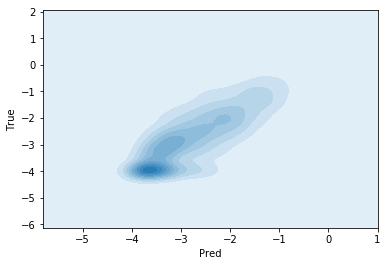

In [6]:
plot_kde(true, pred)

In [84]:
#bin data
true_binned = np.digitize(true,bins)
pred_binned = np.digitize(pred,bins)
#Bin 4 and below contains the positives since <=500 nM is considered nonbinding
-np.log10(500)

-2.6989700043360187

In [36]:
pred = pred[:,0]
pred

array([-4.21, -3.64, -2.64, ..., -3.17, -2.84, -1.38], dtype=float32)

In [73]:
def mean_error(true, pred):
    t = 10**-true
    p = 10**-pred
    return np.average(np.absolute(t-p))

In [5]:
def plot_kde(true, pred):
    ax = sns.kdeplot(pred, true, shade = True)
    plt.xlabel('Pred')
    plt.ylabel('True')
    return(stats.pearsonr(pred, true))

In [25]:
true_binary = []
pred_binary = []
for i in range(len(true)):
    if true[i]<=-np.log10(500):
        true_binary.append(1)
    else:
        true_binary.append(0)
    if pred[i]<=-np.log10(500):
        pred_binary.append(1)
    else:
        pred_binary.append(0)
#Accuracy in predicting binding/not
print('Accuracy',1-np.sum(np.absolute(np.asarray(true_binary)-np.asarray(pred_binary)))/len(true_binary))

Accuracy 0.7906528547337991


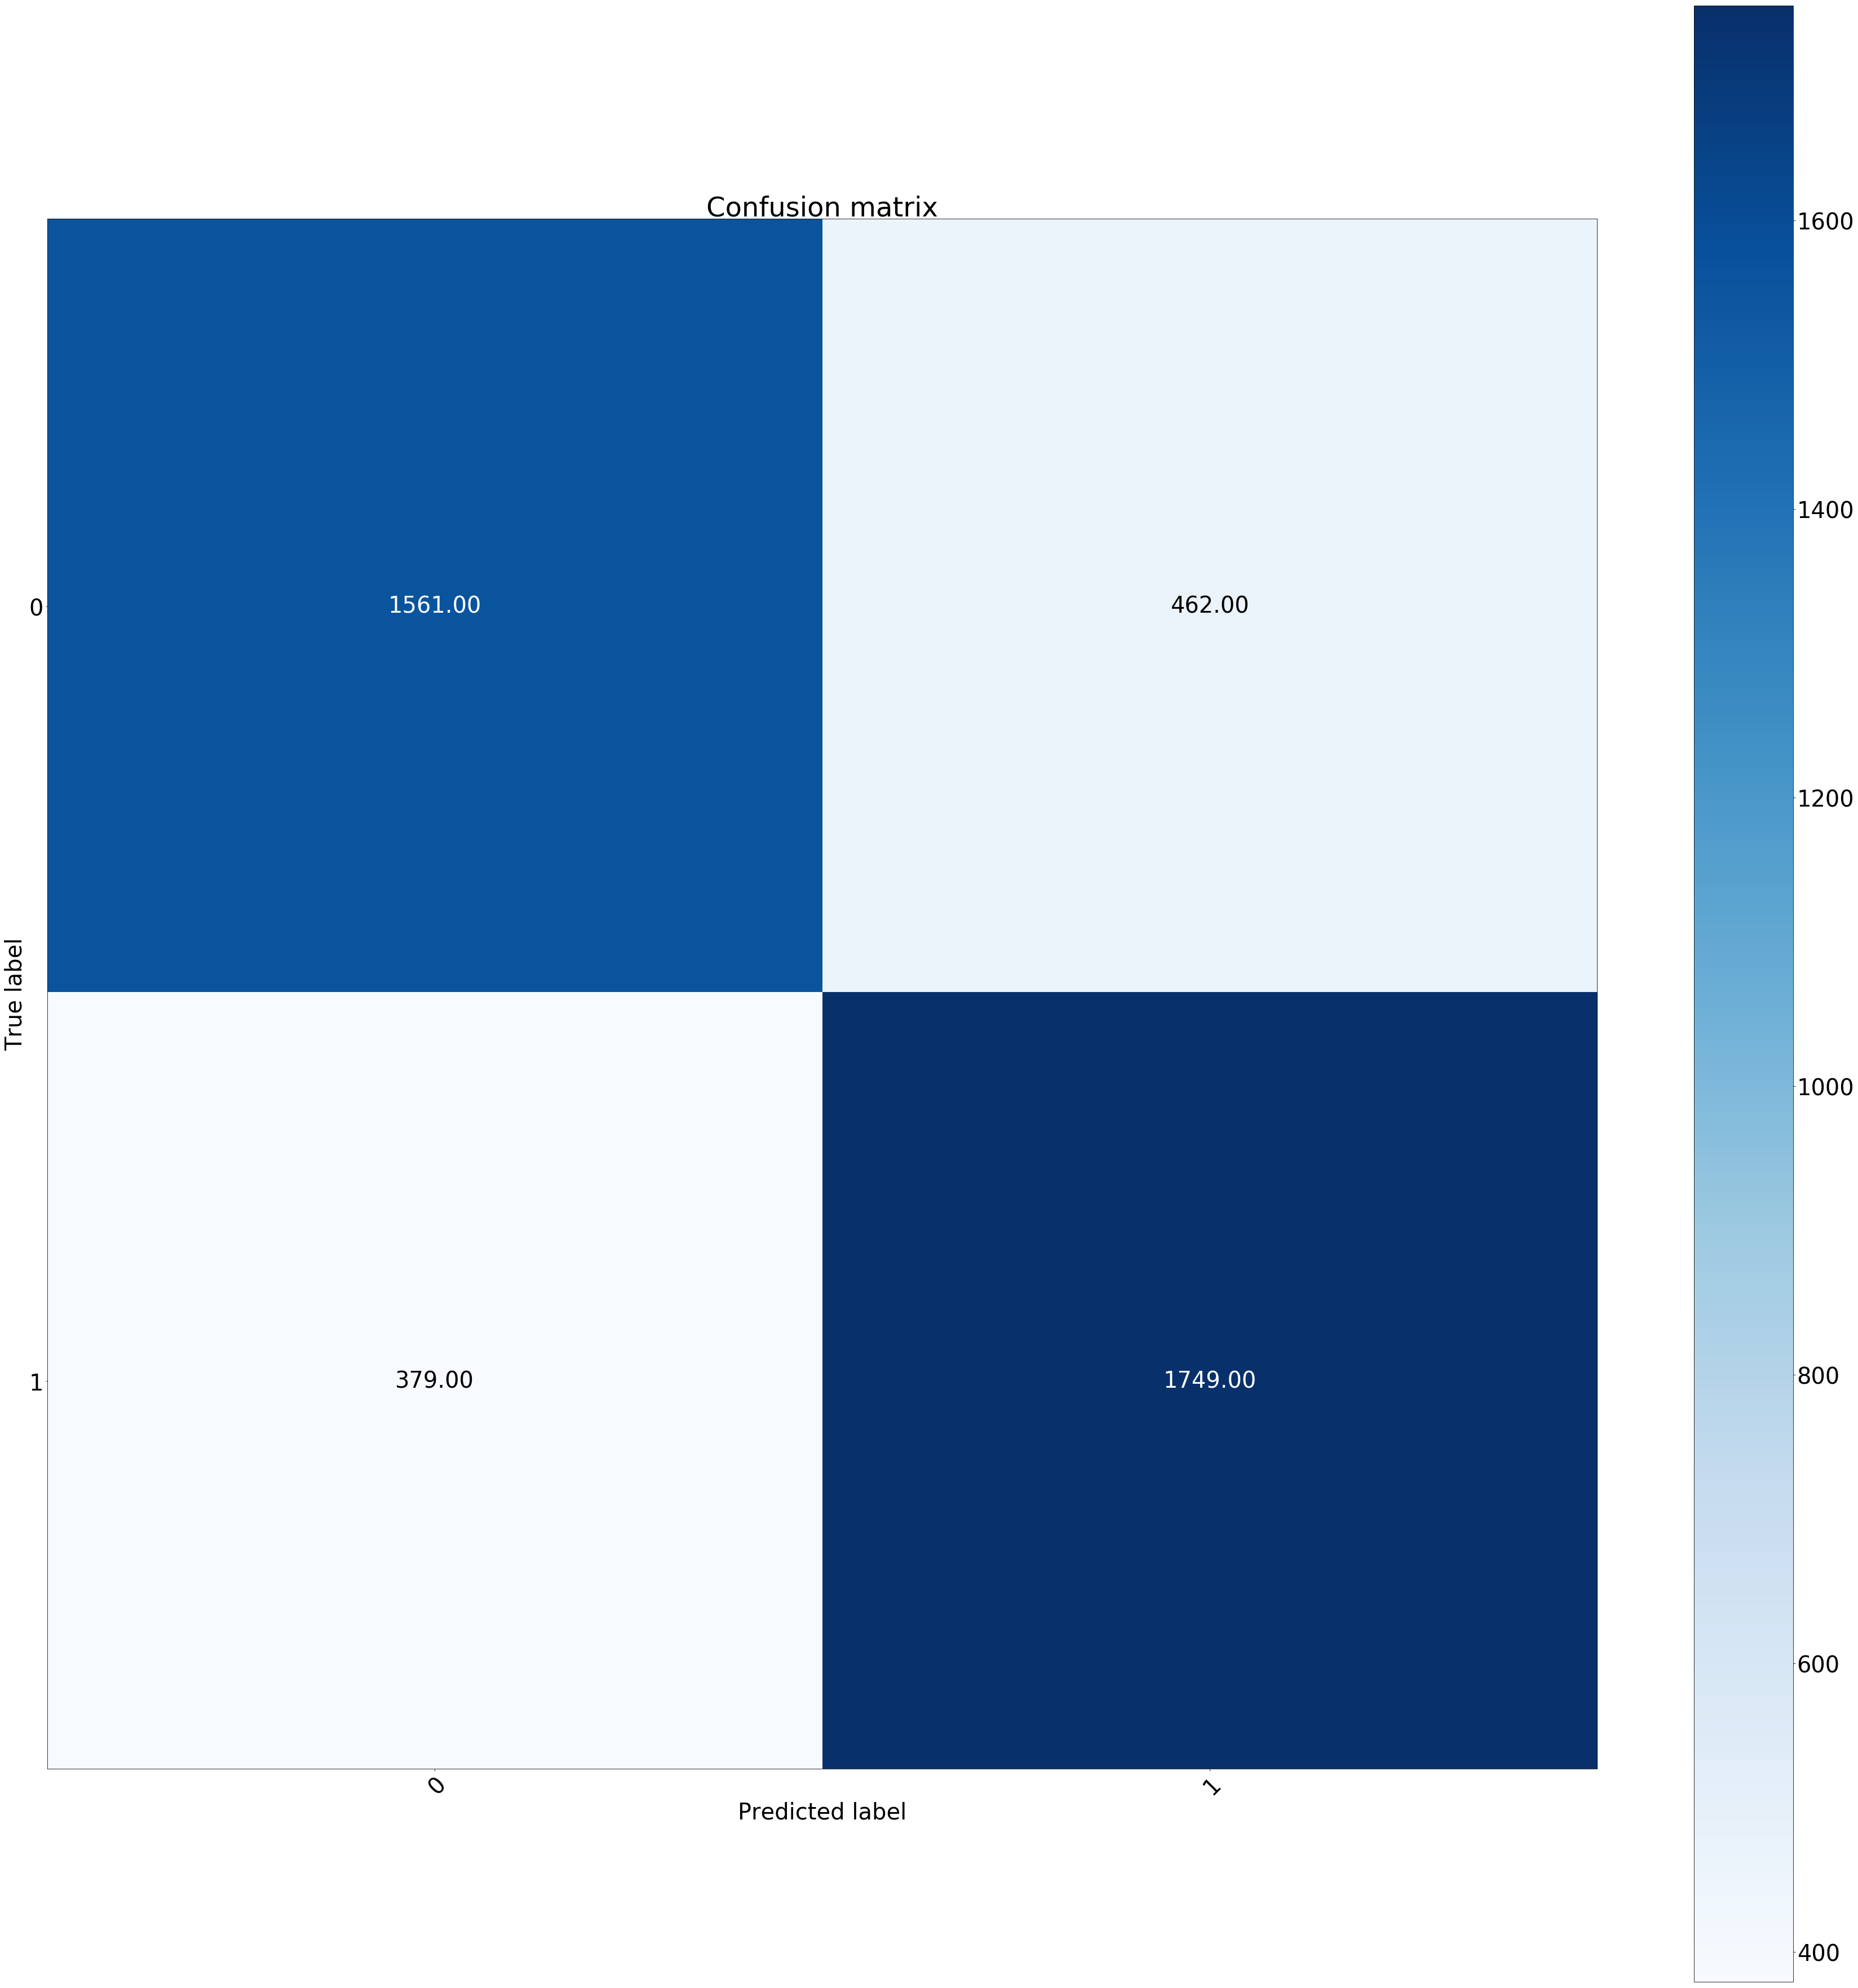

In [12]:
plot_cm(true_binary, pred_binary)

[0.   0.21 1.  ] [0.   0.79 1.  ]
0.7907322371673128
0.7907322371673128


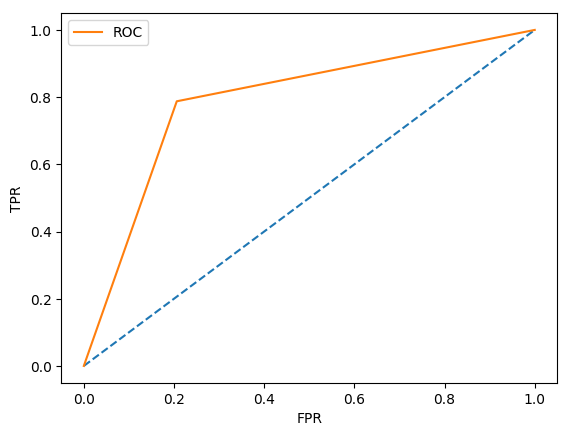

In [26]:
plot_roc(true_binary, pred_binary)

[0.   0.23 1.  ] [0.   0.82 1.  ]
0.7967623969092281
0.7967623969092281


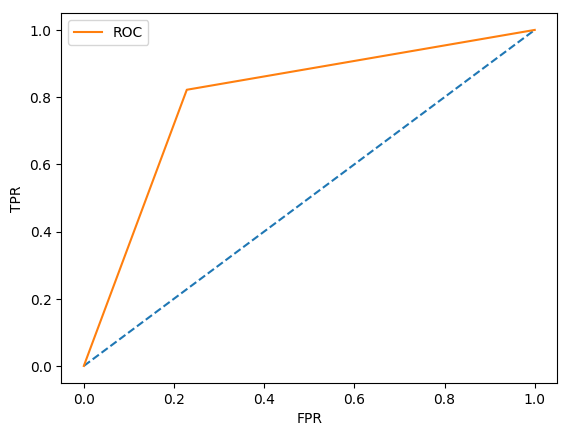

In [14]:
plot_roc(true_binary, pred_binary)

[0.   0.23 1.  ] [0.   0.77 1.  ]
0.7708057742855323
0.7708057742855323


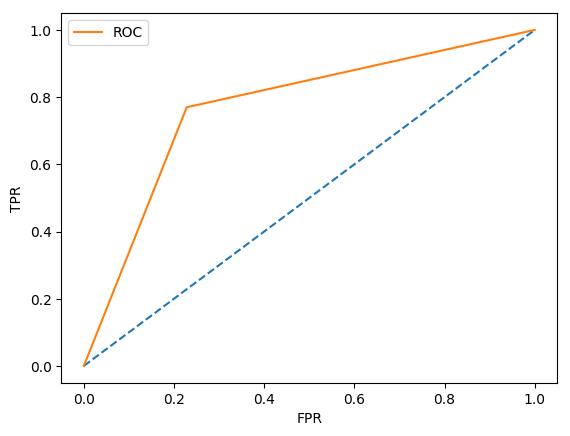

In [93]:
plot_roc(true_binary, pred_binary)

Text(0, 0.5, 'count')

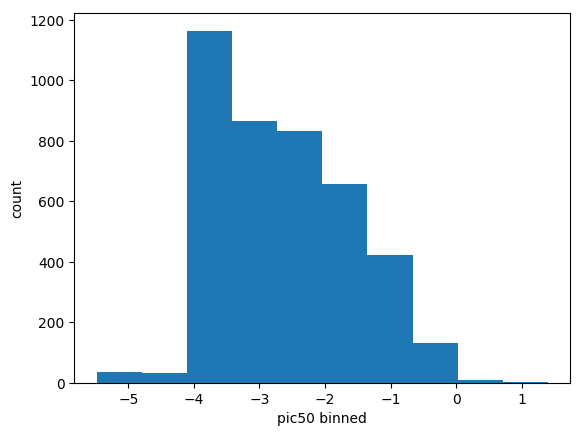

In [77]:
plt.hist(true)
plt.xlabel('pic50 binned')
plt.ylabel('count')

In [10]:
def plot_cm(true, pred):
    plt.rcParams.update({'font.size': 40})
    cm = confusion_matrix(true, pred)
    #pdb.set_trace()
    #cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    #pdb.set_trace()


    fig, ax = plt.subplots(figsize=(50,50))
    cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            #xticklabels=classes, yticklabels=classes,
            title='Confusion matrix',
            ylabel='True label',
            xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor", fontsize = 40.0)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",fontsize = 40.0,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    np.set_printoptions(precision=2)
    plt.show()
    import matplotlib as mpl
    mpl.rcParams.update(mpl.rcParamsDefault)

In [11]:
def plot_roc(true_binary, pred_binary):
    fpr, tpr, thresholds = roc_curve(true_binary, pred_binary)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, label = 'ROC')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    print(fpr, tpr)
    print(auc(fpr,tpr))
    print(roc_auc_score(true_binary, pred_binary))